<a href="https://colab.research.google.com/github/SWiwoo/CornStudy/blob/study/chapter2_%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지도 학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용하는 것

이런 입력/출력 샘플 데이터, 즉 훈련 세트로부터 머신러닝 모델을 만듦

목표 : 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측

장점 : 훈련 데이터를 만드는 데 사람이 개입해 노력해야 하지만 자동화하면 힘들고 어려운 작업의 속도 향상

# 2.1 분류와 회귀

- 지도 학습에는 분류와 회귀가 있음
-> 분류 : 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측 
     ex) 이진 분류(Y/N, P/N), 다중 분류(붓꽃 분류)
-> 회귀 : 연속적인 숫자, 부동소수점수(실수)를 예측
     ex) 교육 수준, 나이 바탕으로 연간 소득 예측, 수확량 예측    

# 2.2 일반화, 과대적합, 과소적합

- 지도 학습에서는 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 거라 기대함
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화 되었다고 함
- 너무 복잡한 모델을 만든다면 훈련세트에만 정확한 모델이 됨 = 과대적합
- 간단할 수록 일반화 되지만 너무 간단하면 = 과소적합
    

## 2.2.1 모델 복잡도와 데이터셋 크기의 관계

    모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관계
    데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있음
    같은 데이터 중복, 비슷한 데이터 모으는 것은 x
    데이터양의 힘을 과소평가 하지 말 것!

# 2.3 지도 학습 알고리즘

- 모델의 복잡도, 알고리즘 살펴보기
- 모델의 장단점 평가, 적절한 데이터 살펴보기
- 매개변수와 옵션 설명
- 분류와 회귀 모델을 모두 가지고 있는 알고리즘 
     

## 2.3.1

    두 개의 특성을 가진 forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋
    다음 코드는 이 데이터셋의 모든 데이터 포인트를 산점도로 그림

In [4]:
pip install mglearn

     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=41482b35d84ed869394199f98f8a531071277d7b23dfef2acc91be5455e507c1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [27]:
import mglearn                                        # 앞으로 이 책에서 임포트되었다고 가정할 라이브러리들
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [15]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)


X.shape: (26, 2)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)


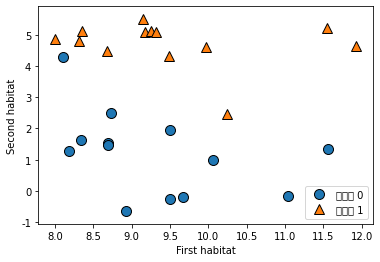

In [22]:
# 데이터셋을 만듭니다
X,y =mglearn.datasets.make_forge()

# 산점도를 그립니다
mglearn.discrete_scatter(X[:,0], X[:,-1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel("First habitat")
plt.ylabel("Second habitat")
print("X.shape:", X.shape)

Text(0, 0.5, 'target')

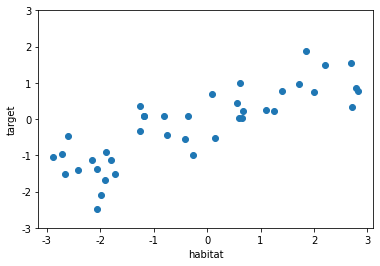

In [23]:
# 회귀 알고리즘 설명을 위해 wave 데이터셋 사용
# wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수를 가짐

X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('habitat')
plt.ylabel('target')

In [24]:
# 이번엔 위스콘신 유방함 데이터셋 사용해 보겠음

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [25]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [30]:
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})     #악성이 212, 양성이 357

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [31]:
# feature_names 속성을 확인하면 각 특성의 의미를 알 수 있음

print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [32]:
# 회귀 분석용 실제 데이터셋으로는 보스톤 주택가격 사용
# 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스톤 주택 평균 가격을 예측

from sklearn.datasets import load_boston
boston=load_boston()
print("데이터의 형태", boston.data.shape)


데이터의 형태 (506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# 13개의 입력 특성뿐 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장
# 범죄율 * 고속도로 접근성 도 특성으로 생각하는 것 -> "특성 공학(feature engineering)"

In [33]:
X,y=mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)      # 13개의 원래 특성에서 13개에서 2개씩 곱한 91개의 특성을 더해 총 104개

X.shape: (506, 104)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## k-최근접 이웃

- k-NN 알고리즘은 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 ㅏ장 가까운 데이터 포인트, 즉 최근접 이웃을 찾음


### k-최근접 이웃 분류


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


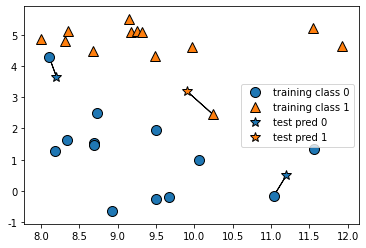

In [34]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

# 데이터 포인트 3개를 추가(별 모양으로 표시)
# 추가한 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 연결
# 1-최근접 이웃 알고리즘의 예측은 이 데이터 포인트의 레이블이 됨(같은 색으로 연결함)

In [ ]:
class CustomDataset(Dataset):
  
  def __init__(self, dataset, option, modelname):
    self.dataset = dataset 
    self.option = option
    self.tokenizer = AutoTokenizer.from_pretrained(modelname)
  
  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, idx):
    row = self.dataset.iloc[idx, 0:2].values  # numpy array
    text = row[0]
    # y = row[1]

    inputs = self.tokenizer(
        text, 
        return_tensors='pt',
        truncation=True,
        max_length=100,
        pad_to_max_length=True,
        add_special_tokens=False
        )
    
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    
    if self.option =='train':
        y = row[1]
        return input_ids, attention_mask, y

    return input_ids, attention_mask

In [ ]:
device = torch.device("cuda")
device

device(type='cuda')

In [ ]:
modelname = 'klue/roberta-large'
# modelname = 'monologg/koelectra-base-v3-discriminator'
modelname

'klue/roberta-large'

In [ ]:
n_splits = 5

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = n_splits, shuffle=True, random_state=42)

folds=[]
for trn_idx, val_idx in skf.split(clean_train['text_sum'], clean_train['label']):
    folds.append((trn_idx,val_idx))

In [ ]:
import time

In [ ]:
best_models = []
model_num = 0
for fold in range(5):
    start_time = time.time()
    print(f'=============================={fold+1}fold start==============================')

    # CV용 model 새로 선언
    model = AutoModelForSequenceClassification.from_pretrained(modelname, num_labels=3)
    model = nn.DataParallel(model).to(device)
    
    optimizer = AdamW(model.parameters(), lr=lr)
    
    train_idx = folds[fold][0]
    valid_idx = folds[fold][1]

    train_data = clean_train.loc[train_idx]
    val_data = clean_train.loc[valid_idx]

    train_dataset = CustomDataset(train_data, 'train', modelname)
    valid_dataset = CustomDataset(val_data, 'train', modelname)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
    
    warmup_ratio = 0.1
    total_steps = len(train_loader) * num_epochs
    warmup_step = int(total_steps * warmup_ratio)
    scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=1, num_training_steps=total_steps)
    valid_loss_min = 0.4
    valid_acc_max = 0.8
    
    
    for epoch in range(num_epochs):  # epoch = 10
        print(f'epoch : {epoch}-----------------------------------------------------------------')
        batches = 0
        total_loss = 0.0
        correct = 0
        total =0
        model.train()  # train 모드로 변경
        
        # 학습데이터로 학습 #############################################################
        print(f'train 학습..........')
        for input_ids_batch, attention_masks_batch, y_batch in train_loader:
            optimizer.zero_grad()  # 그래디언트 초기화
            y_batch = y_batch.to(device)  # y_batch를 gpu 올림
            y_pred = model(input_ids_batch.to(device), attention_mask = attention_masks_batch.to(device))[0]  # 순전파
            loss = F.cross_entropy(y_pred, y_batch)  # loss 계산
            loss.backward()  # 역전파
            optimizer.step()  # 가중치 업데이트
            total_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            correct += (predicted == y_batch).sum()
            total += len(y_batch)
            batches += 1
            if batches % 100 == 0:
                acc = correct.float() / total
                print(f'iteration 누적 : {batches}, Train Loss: {total_loss:.4f}, Train Accuracy : {acc.item():.4f}')
        acc = correct.float() / total
        print(f'iteration 누적 : {batches}, Train Loss: {total_loss:.4f}, Train Accuracy : {acc.item():.4f}')
        # 학습데이터로 학습 #############################################################


        # 검증데이터로 검증 #############################################################
        val_loss = []
        val_acc = []
        print(f'validation 검증..........')
        for input_ids_batch, attention_masks_batch, y_batch in valid_loader:
            
            model.eval()
            with torch.no_grad():
                y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
                valid_loss = F.cross_entropy(y_pred,y_batch.to(device)).cpu().detach().numpy()

                preds = torch.argmax(y_pred,1)
                preds = preds.cpu().detach().numpy()
                y_batch = y_batch.cpu().detach().numpy()
                batch_acc = (preds==y_batch).mean()
                val_loss.append(valid_loss)
                val_acc.append(batch_acc)

        val_loss = np.mean(val_loss)
        val_acc = np.mean(val_acc)
        scheduler.step()
        print(f'Valid Loss: {val_loss:.4f}, Valid Accuracy : {val_acc:.4f}')
        print(f'Learning rate : {optimizer.param_groups[0]["lr"]:.6f}')
        # 검증데이터로 검증 #############################################################

        if valid_acc_max < val_acc:  # 이전보다 좋으면 best_models에 모델을 추가
            valid_acc_max = val_acc
            best_models.append(model)
            torch.save(model, f'koelectra-adddata{model_num}.pth')  # 모델 저장
            model_num += 1
            print(f'model \'koelectra-adddata{model_num}.pth\' save. the number of best_models: {len(best_models)}, model val acc : {val_acc:.6f}******************')
        print(f'--------------------------------------------------------------------------------')

    print(f'{fold+1}fold elapsed time : {time.time() - start_time}')

==============================1fold start==============================


Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'cla

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/734k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/173 [00:00<?, ?B/s]

epoch : 0-----------------------------------------------------------------
train 학습..........
iteration 누적 : 100, Train Loss: 111.2338, Train Accuracy : 0.3450
iteration 누적 : 200, Train Loss: 221.3572, Train Accuracy : 0.3525
iteration 누적 : 300, Train Loss: 332.0539, Train Accuracy : 0.3500
iteration 누적 : 400, Train Loss: 443.3330, Train Accuracy : 0.3475
iteration 누적 : 500, Train Loss: 554.3957, Train Accuracy : 0.3520
iteration 누적 : 600, Train Loss: 665.5980, Train Accuracy : 0.3495
iteration 누적 : 700, Train Loss: 776.5970, Train Accuracy : 0.3453
iteration 누적 : 800, Train Loss: 887.6077, Train Accuracy : 0.3435
iteration 누적 : 900, Train Loss: 998.1777, Train Accuracy : 0.3457
iteration 누적 : 1000, Train Loss: 1108.9633, Train Accuracy : 0.3453
iteration 누적 : 1100, Train Loss: 1220.0325, Train Accuracy : 0.3437
iteration 누적 : 1200, Train Loss: 1331.7084, Train Accuracy : 0.3417
iteration 누적 : 1300, Train Loss: 1443.4533, Train Accuracy : 0.3413
iteration 누적 : 1400, Train Loss: 1554.14

In [ ]:
test_dataset = CustomDataset(clean_test,'test')
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)

preds = []
for idx, m in enumerate(best_models): 
    print(f'{idx+1}/{len(best_models)}번째 모델 예측 진행중')
    bestm = m
    bestm.eval()
    answer = []
    with torch.no_grad():
        for input_ids_batch, attention_masks_batch in tqdm(test_loader):
            y_pred = bestm(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0].detach().cpu().numpy()
            answer.extend(y_pred.argmax(axis=1))
            
    preds.append(answer)

In [ ]:
start_time = time.time()

# model 선언
model = AutoModelForSequenceClassification.from_pretrained(modelname, num_labels=3)
model = nn.DataParallel(model).to(device)

optimizer = AdamW(model.parameters(), lr=lr)

train_dataset = CustomDataset(clean_train, 'train', modelname)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

warmup_ratio = 0.1
total_steps = len(train_loader) * num_epochs
warmup_step = int(total_steps * warmup_ratio)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=1, num_training_steps=total_steps)


for epoch in range(num_epochs):  # epoch = 10
    print(f'epoch : {epoch}-----------------------------------------------------------------')
    batches = 0
    total_loss = 0.0
    correct = 0
    total =0

    model.train()  # train 모드로 변경
    
    # 학습데이터로 학습 #############################################################
    print(f'train 학습..........')
    for input_ids_batch, attention_masks_batch, y_batch in train_loader:
        optimizer.zero_grad()  # 그래디언트 초기화
        y_batch = y_batch.to(device)  # y_batch를 gpu 올림
        y_pred = model(input_ids_batch.to(device), attention_mask = attention_masks_batch.to(device))[0]  # 순전파
        loss = F.cross_entropy(y_pred, y_batch)  # loss 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
        scheduler.step()
        total_loss += loss.item()
        _, predicted = torch.max(y_pred, 1)
        correct += (predicted == y_batch).sum()
        total += len(y_batch)
        batches += 1
        if batches % 100 == 0:
            acc = correct.float() / total
            print(f'Batch 누적 : {batches}, Train Loss: {total_loss:.4f}, Train Accuracy : {acc.item():.4f}')
    acc = correct.float() / total
    print(f'iteration 누적 : {batches}, Train Loss: {total_loss:.4f}, Train Accuracy : {acc.item():.4f}')
    # 학습데이터로 학습 #############################################################

print(f'elapsed time : {time.time() - start_time}')

In [ ]:
torch.save(model, 'roberta_yeah.pth')

In [ ]:
train_data = TrainDataset(train)

test_data = TestDataset(test)

train_dataloader = torch.utils.data.DataLoader(train_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                      num_workers=NUM_CORES)
test_dataloader = torch.utils.data.DataLoader(test_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                      num_workers=NUM_CORES)
#두가지 모델
#"klue/roberta-large"
#"monologg/koelectra-base-v3-discriminator"
model = AutoModelForSequenceClassification.from_pretrained("klue/roberta-large",num_labels=3)


####미세조정
n=0
for name, child in model.named_children():
    if n==0:
      h=0
      for param in child.parameters():
        if h<=229: #이부분 숫자 조절로 fine-tuning => Roberta229: h=229
          param.requires_grad = False
        h+=1
    n+=1
#####
    # print(param)

optimizer = AdaBelief(model.parameters(), lr=1e-5, eps=1e-16, betas=(0.9,0.999), weight_decouple = True, rectify = False)

warmup_ratio = 0.1
t_total = len(train_dataloader) * NUM_EPOCHS
warmup_step = int(t_total * warmup_ratio)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

for e in range(NUM_EPOCHS):
    train_acc = 0.0
    test_acc = 0.0
    best_acc =0.0
    model.train()
    torch.set_grad_enabled(True)
    for batch_id, (input_id,token_type_id,attention_mask,label) in enumerate(tqdm.notebook.tqdm(train_dataloader)):
        optimizer.zero_grad()
        input_id = input_id.long().to(device)
        token_type_id = token_type_id.long().to(device)
        attention_mask = attention_mask.long().to(device)
        label = label.to(device)
        outputs = model(input_ids=input_id, token_type_ids=token_type_id, attention_mask=attention_mask, labels=label)
        loss = outputs[0]
        out = outputs[1]
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))

preds = [] 
model.eval()
torch.set_grad_enabled(False)
for batch_id, (input_id,token_type_id,attention_mask) in enumerate(tqdm_notebook(test_dataloader)):
    input_id = input_id.long().to(device)
    token_type_id = token_type_id.long().to(device)
    attention_mask = attention_mask.long().to(device)
    outputs = model(input_ids=input_id, token_type_ids=token_type_id, attention_mask=attention_mask)
    out = outputs[0]
    for inp in out:
      preds.append(inp.detach().cpu().numpy())
Preds = np.array(preds)

In [ ]:
PATH='/content/drive'